In [1]:
import json
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family='AppleGothic')

In [2]:
df_raw = pd.read_csv("./data/main_data/main_df.csv")
df = df_raw.copy()

In [3]:
# preprocessing
df['거래금액(억)'] = df['거래금액(만원)'].apply(lambda x : round(x/10000,2))
df['계약년월일'] = df['계약년월일'].apply(lambda x : datetime.datetime.strptime(x,"%Y-%m-%d").date())

In [4]:
# 총 데이터 갯수
len(df)

775516

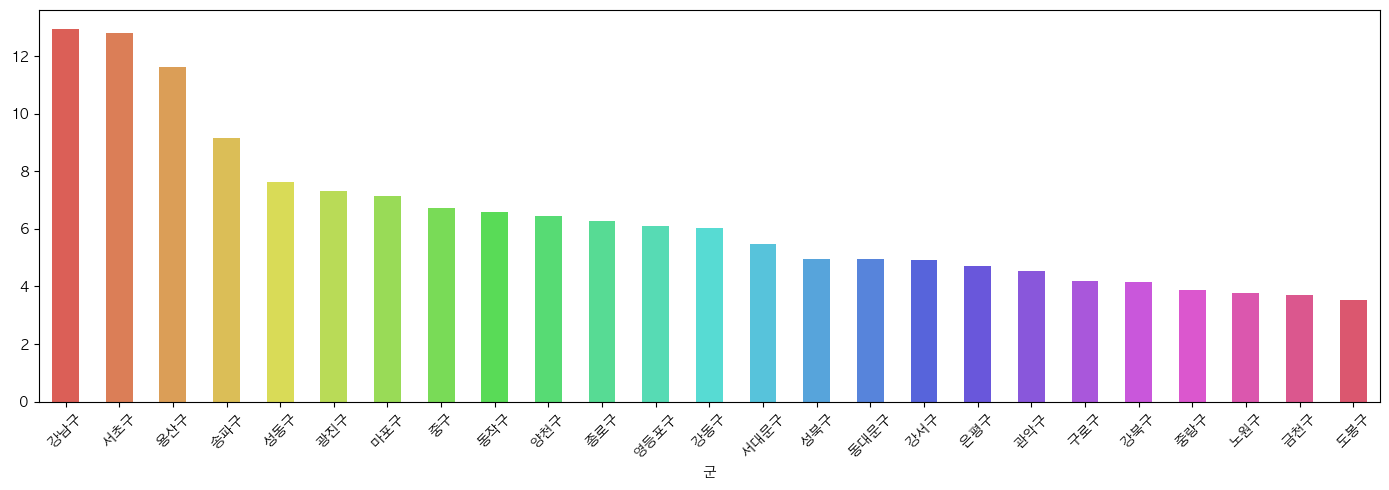

In [5]:
# 군별 평균 가격
colors = sns.color_palette('hls',len(df['군'].unique()))
plt.figure(figsize=(14,5))
df.groupby('군')['거래금액(억)'].mean().sort_values(ascending=False).plot(kind='bar',color=colors)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

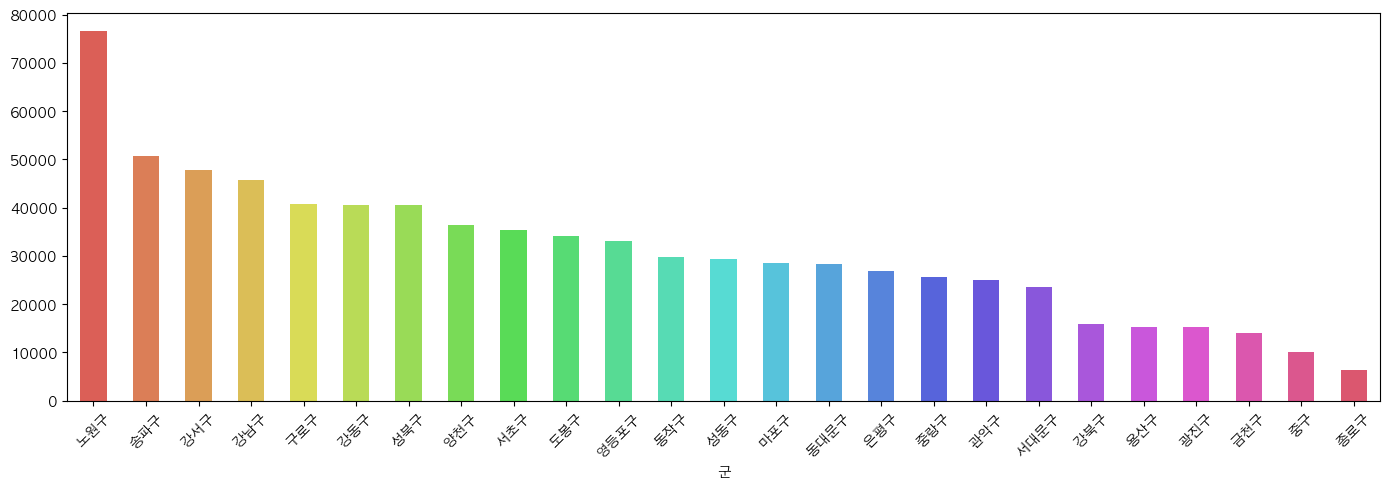

In [6]:
# 군별 거래 횟수
colors = sns.color_palette("hls", len(df["군"].unique()))
plt.figure(figsize=(14,5))
df.groupby("군")["거래금액(억)"].count().sort_values(ascending=False).plot(
    kind="bar", color=colors
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

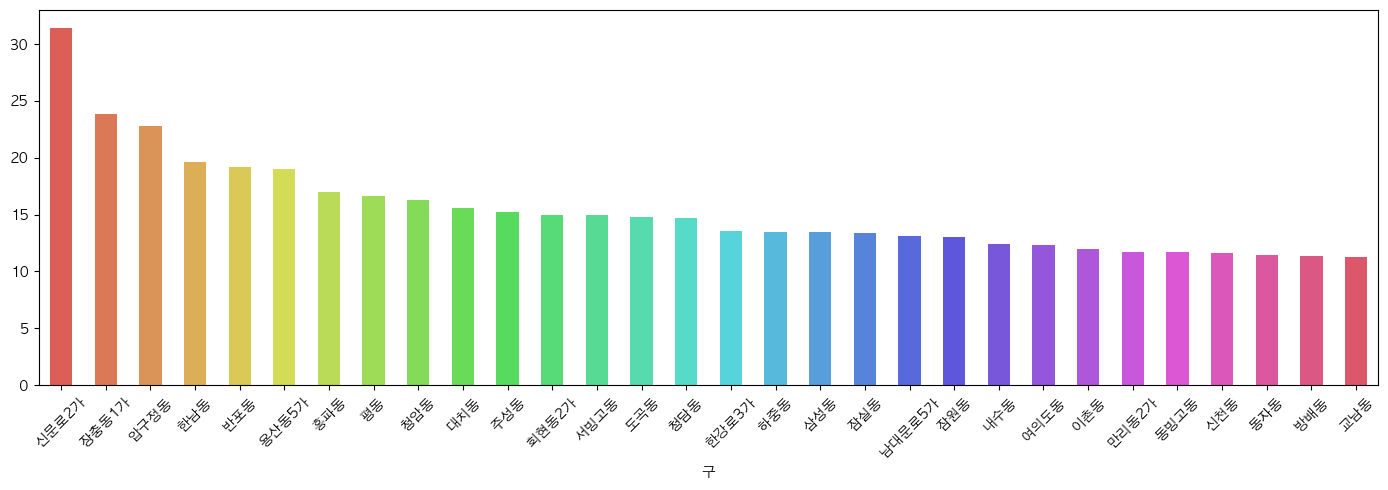

In [7]:
# 구 top 30
colors = sns.color_palette('hls',30)
plt.figure(figsize=(14,5))
df.groupby('구')['거래금액(억)'].mean().nlargest(30).plot(kind='bar',color=colors)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

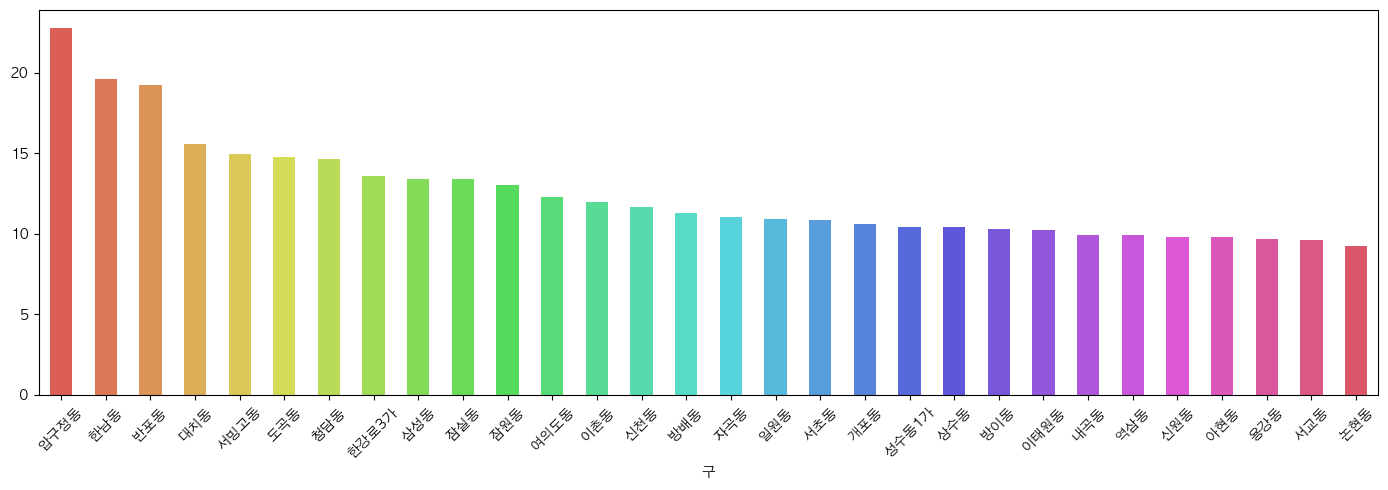

In [8]:
contract_over_500 = df["구"].value_counts()[df["구"].value_counts() > 500].index
# 구 top 30 with 계약건수 500 이상
colors = sns.color_palette("hls", 30)
plt.figure(figsize=(14,5))
df[df["구"].isin(contract_over_500)].groupby("구")["거래금액(억)"].mean().nlargest(30).plot(
    kind="bar", color=colors
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

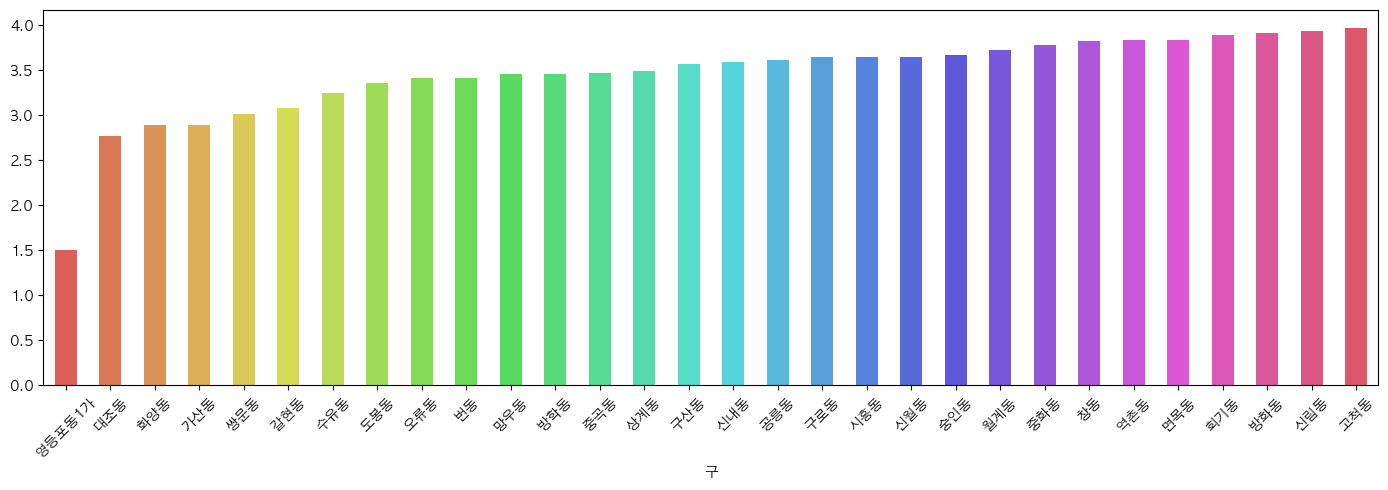

In [9]:
# 구 bottom 30 with 계약건수 500 이상

colors = sns.color_palette("hls", 30)
plt.figure(figsize=(14,5))
df[df["구"].isin(contract_over_500)].groupby("구")["거래금액(억)"].mean().nsmallest(30).plot(
    kind="bar", color=colors
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()